## 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터셋 준비

Pima Indians Diabetes는 당뇨병 여부를 0과 1로 예측하는 이진분류

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',sep=',', )
diabetes

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


- Pregnancies : 임신횟수
- Glucose : 포도당 농도
- BloodPressure : 혈압
- SkinThickness : 피부두께
- Insulin : 인슐린
- BMI : 체질량지수
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

In [ ]:
new_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes = diabetes.shift(1)
diabetes

,6,148,72,35,0,33.6,0.627,50,1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [ ]:
diabetes.columns = new_columns
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [ ]:
new_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50, 1]
diabetes.loc[0] = new_data
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0


## 데이터 정보

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

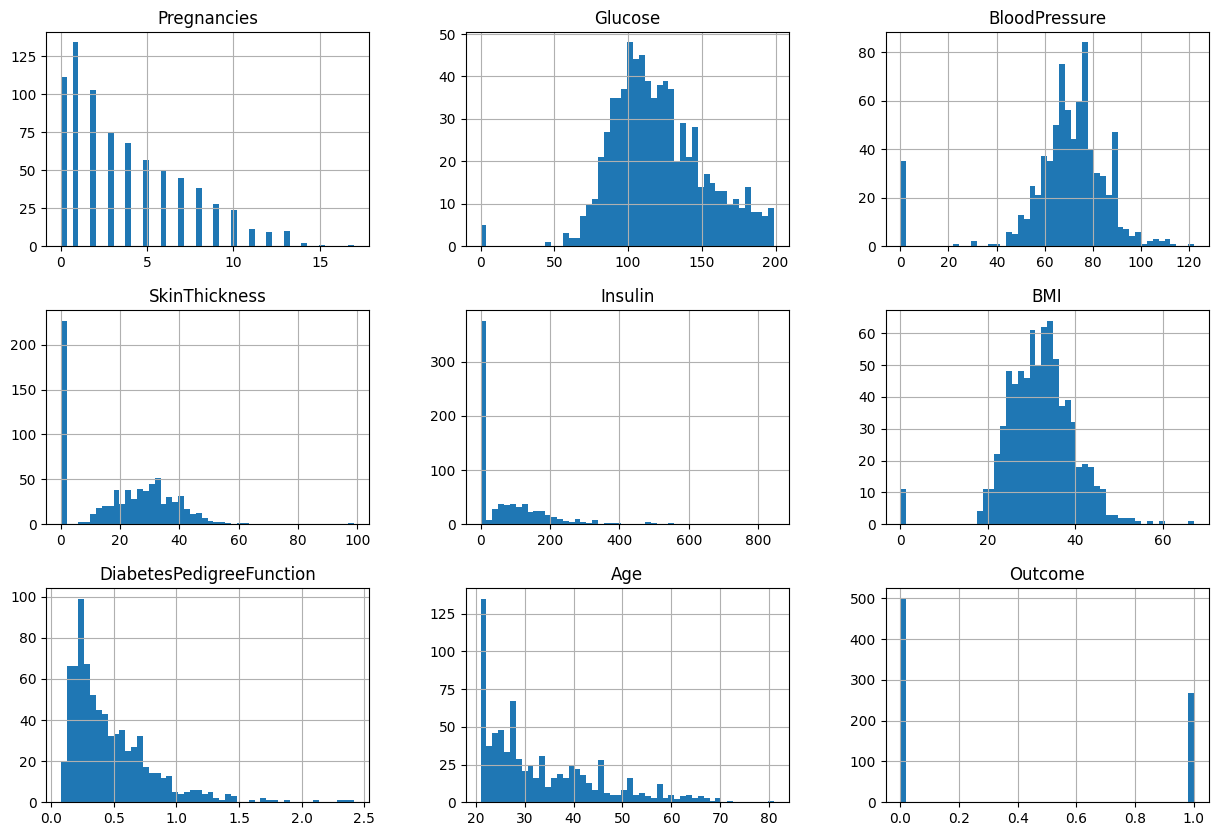

In [ ]:
diabetes.hist(bins=50,figsize=(15,10))

- Pregnancies : 임신횟수
- Glucose : 포도당 농도
- BloodPressure : 혈압
- SkinThickness : 피부두께
- Insulin : 인슐린
- BMI : 체질량지수
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

## 데이터 나누기

In [ ]:
inputs = diabetes.drop(columns=['Outcome'])
targets = diabetes['Outcome']

In [ ]:
# training set, test set 나누기
from sklearn.model_selection import train_test_split
(inputs_train,inputs_test,targets_train, targets_test) = train_test_split(inputs,targets,test_size=0.2)

In [ ]:
inputs_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
677,0.0,93.0,60.0,0.0,0.0,35.3,0.263,25.0
715,7.0,187.0,50.0,33.0,392.0,33.9,0.826,34.0
345,8.0,126.0,88.0,36.0,108.0,38.5,0.349,49.0
335,0.0,165.0,76.0,43.0,255.0,47.9,0.259,26.0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0
...,...,...,...,...,...,...,...,...
362,5.0,103.0,108.0,37.0,0.0,39.2,0.305,65.0
456,1.0,135.0,54.0,0.0,0.0,26.7,0.687,62.0
132,3.0,170.0,64.0,37.0,225.0,34.5,0.356,30.0
257,2.0,114.0,68.0,22.0,0.0,28.7,0.092,25.0


## 학습

#### 초기모델

In [ ]:
class BinaryModel(tf.keras.Model):
    def __init__(self):
        super(BinaryModel, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([8, 16]))
        self.b1 = tf.Variable(initializer([16]))
        self.w2 = tf.Variable(initializer([16, 24]))
        self.b2 = tf.Variable(initializer([24]))
        self.w3 = tf.Variable(initializer([24, 36]))
        self.b3 = tf.Variable(initializer([36]))
        self.w4 = tf.Variable(initializer([36, 27]))
        self.b4 = tf.Variable(initializer([27]))
        self.w5 = tf.Variable(initializer([27, 18]))
        self.b5 = tf.Variable(initializer([18]))
        self.w6 = tf.Variable(initializer([18, 1]))
        self.b6 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.sigmoid(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.sigmoid(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.sigmoid(y3)
        y4 = self.b4 + y3 @ self.w4
        y4 = tf.keras.activations.sigmoid(y4)
        y5 = self.b5 + y4 @ self.w5
        y5 = tf.keras.activations.sigmoid(y5)
        y6 = self.b6 + y5 @ self.w6
        y6 = tf.keras.activations.sigmoid(y6)
        return tf.squeeze(y6)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = BinaryModel()
model.compile(optimizer=opt,loss = 'binary_crossentropy')
history = model.fit(inputs_train, targets_train, epochs=100, batch_size=25)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7385
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6424
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6423
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6416
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6420
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6414
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6425
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6420
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6417
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6425
Epoch 11/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 13/100
25/25 [=================

<Axes: >

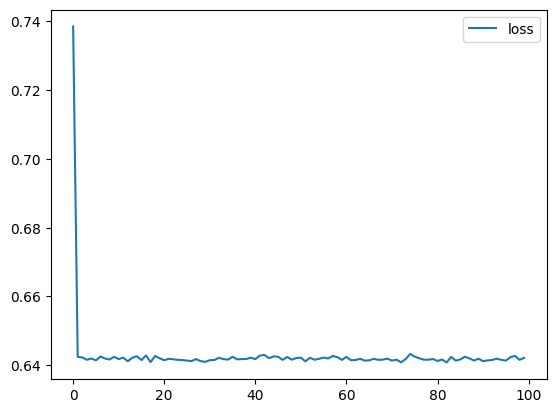

In [ ]:
pd.DataFrame(history.history).plot()

#### 2차 모델

In [ ]:
class BinaryModel(tf.keras.Model):
    def __init__(self):
        super(BinaryModel, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([8, 24]))
        self.b1 = tf.Variable(initializer([24]))
        self.w2 = tf.Variable(initializer([24, 48]))
        self.b2 = tf.Variable(initializer([48]))
        self.w3 = tf.Variable(initializer([48, 64]))
        self.b3 = tf.Variable(initializer([64]))
        self.w4 = tf.Variable(initializer([64, 48]))
        self.b4 = tf.Variable(initializer([48]))
        self.w5 = tf.Variable(initializer([48, 24]))
        self.b5 = tf.Variable(initializer([24]))
        self.w6 = tf.Variable(initializer([24, 8]))
        self.b6 = tf.Variable(initializer([8]))
        self.w7 = tf.Variable(initializer([8,1]))
        self.b7 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.sigmoid(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.sigmoid(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.sigmoid(y3)
        y4 = self.b4 + y3 @ self.w4
        y4 = tf.keras.activations.sigmoid(y4)
        y5 = self.b5 + y4 @ self.w5
        y5 = tf.keras.activations.sigmoid(y5)
        y6 = self.b6 + y5 @ self.w6
        y6 = tf.keras.activations.sigmoid(y6)
        y7 = self.b7 + y6 @ self.w7
        y7 = tf.keras.activations.sigmoid(y7)
        return tf.squeeze(y7)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = BinaryModel()
model.compile(optimizer=opt,loss = 'binary_crossentropy')
history = model.fit(inputs_train, targets_train, epochs=100, batch_size=25)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.8272
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6529
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6420
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6414
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6409
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6419
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6412
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6410
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6415
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6414
Epoch 11/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6411
Epoch 12/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6412
Epoch 13/100
25/25 [=================

<Axes: >

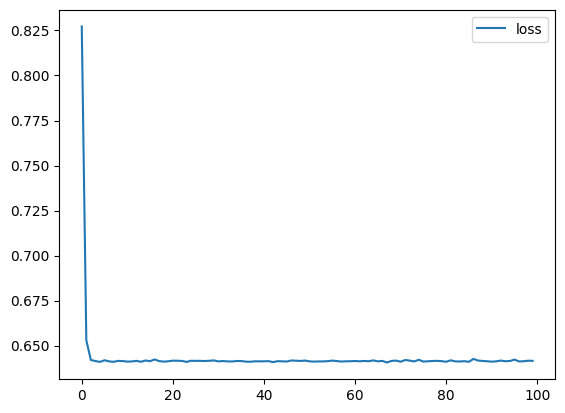

In [ ]:
pd.DataFrame(history.history).plot()

#### adam 최적화 알고리즘 사용

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model = BinaryModel()
model.compile(optimizer=opt,loss = 'binary_crossentropy')
history = model.fit(inputs_train, targets_train, epochs=100, batch_size=25)

Epoch 1/100
25/25 [==============================] - 3s 3ms/step - loss: 0.7682
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6449
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6461
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6450
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6442
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6441
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6418
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6466
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6450
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6424
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6503
Epoch 13/100
25/25 [=================

<Axes: >

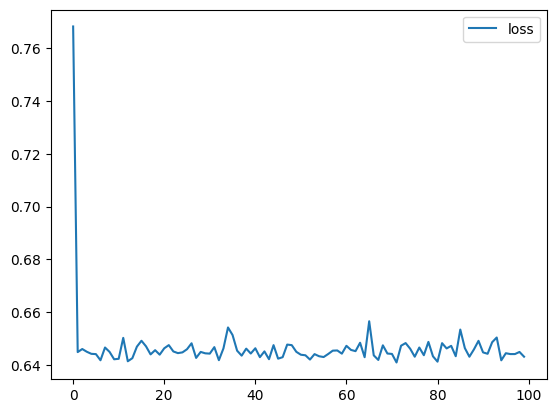

In [ ]:
pd.DataFrame(history.history).plot()